Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
common_fldr = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration")
data_dir_train = common_fldr/"Train"
data_dir_test = common_fldr/"Test"

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 2239 files belonging to 9 classes.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, batch_size=batch_size, image_size=(img_height, img_width), seed=123)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
val_ds.class_names

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

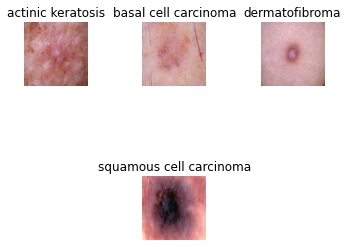

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(class_names)):
    filtered_ds = val_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
model = Sequential(
    [
        layers.experimental.preprocessing.Rescaling(scale=1./255),
        layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(180,180,3)),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, padding='same', activation='relu'), #90,90,32
        layers.MaxPooling2D(2),
        layers.Conv2D(64, 3, padding='same', activation='relu'), #45,45,64
        layers.MaxPooling2D(2),
        # layers.Conv2D(64, 3, padding='same', activation='relu'),
        # layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(9),
        # layers.Activation('softmax')
    ]
)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# ### Todo, choose an appropirate optimiser and loss function
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=keras.metrics.SparseCategoricalAccuracy())

In [ ]:
# View the summary of all layers
# model.summary()

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 248s 95ms/step - loss: 1.9417 - sparse_categorical_accuracy: 0.2943 - val_loss: 2.2497 - val_sparse_categorical_accuracy: 0.2034
Epoch 2/20
70/70 [==============================] - 2s 32ms/step - loss: 1.5659 - sparse_categorical_accuracy: 0.4457 - val_loss: 2.2485 - val_sparse_categorical_accuracy: 0.2712
Epoch 3/20
70/70 [==============================] - 2s 31ms/step - loss: 1.3946 - sparse_categorical_accuracy: 0.5065 - val_loss: 2.1076 - val_sparse_categorical_accuracy: 0.3220
Epoch 4/20
70/70 [==============================] - 2s 31ms/step - loss: 1.2960 - sparse_categorical_accuracy: 0.5494 - val_loss: 2.6521 - val_sparse_categorical_accuracy: 0.2797
Epoch 5/20
70/70 [==============================] - 2s 31ms/step - loss: 1.2452 - sparse_categorical_accuracy: 0.5668 - val_loss: 2.4570 - val_sparse_categorical_accuracy: 0.2881
Epoch 6/20
70/70 [==============================] - 2s 31ms/step - loss: 1.1369 - sparse_categorical_ac

### Visualizing training results

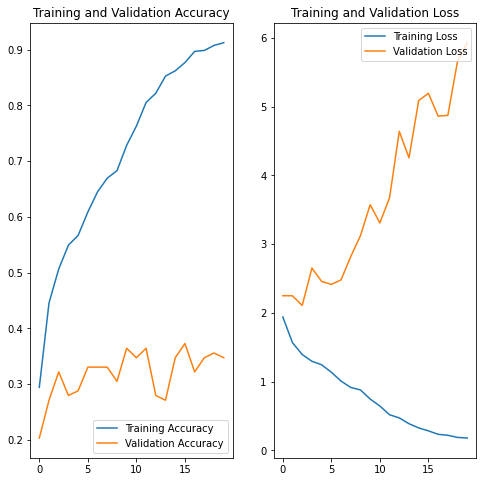

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
There is an overfitting given by the divergence in losses for train and validation.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# layers.RandomFlip("horizontal_and_vertical"),
# layers.RandomRotation(0.2),
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True,)
# val_datagen = ImageDataGenerator(rescale=1./255)

# # train_datagen.fit(train_ds)

# train_generator = train_datagen.flow_from_directory(
#         data_dir_train,
#         target_size=(180, 180),
#         batch_size=32,
#         shuffle=True,
#         seed=123,
#         class_mode='categorical',
#         )
# validation_generator = val_datagen.flow_from_directory(
#         data_dir_test,
#         target_size=(180, 180),
#         batch_size=32,
#         shuffle=True,
#         seed=123,
#         class_mode='categorical',
#         )

def augmentation(img):
  return Sequential(
    [
        layers.RandomFlip('horizontal_and_vertical', seed=123),
        layers.RandomRotation(0.1, seed=123),
        layers.RandomZoom(0.1, 0.1, seed=123),
        #layers.RandomHeight(factor=0.05, seed=123),
        #layers.RandomWidth(factor=0.05, seed=123),
        #layers.RandomContrast(factor=0.2, seed=123),
        # layers.RandomBrightness(factor=0.05, seed=123),
    ]
  )(img)

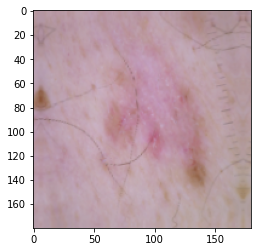

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
fig = plt.figure()
for X_batch, y_batch in train_ds:
    img = X_batch[0]
    img = augmentation(img)
    plt.imshow(img.numpy().astype('uint8'))
    plt.show()
    break

  

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential(
    [
        layers.RandomFlip('horizontal_and_vertical', seed=123),
        layers.RandomRotation(0.1, seed=123),
        layers.RandomZoom(0.1, 0.1, seed=123),
        #layers.RandomHeight(factor=0.05, seed=123),
        #layers.RandomWidth(factor=0.05, seed=123),
        # layers.RandomContrast(factor=0.2, seed=123),
        # layers.RandomBrightness(factor=0.1, seed=123),
     
        layers.experimental.preprocessing.Rescaling(scale=1./255),
        layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(180,180,3)),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        layers.Conv2D(32, 3, padding='same', activation='relu'), #90,90,32
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        layers.Conv2D(64, 3, padding='same', activation='relu'), #45,45,64
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(9),
    ]
)


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=keras.metrics.SparseCategoricalAccuracy())


### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
        train_ds,
        epochs=20,
        validation_data=val_ds,)

Epoch 1/20
70/70 [==============================] - 6s 61ms/step - loss: 2.1015 - sparse_categorical_accuracy: 0.2492 - val_loss: 2.1743 - val_sparse_categorical_accuracy: 0.2034
Epoch 2/20
70/70 [==============================] - 4s 57ms/step - loss: 1.7622 - sparse_categorical_accuracy: 0.3609 - val_loss: 2.1038 - val_sparse_categorical_accuracy: 0.2881
Epoch 3/20
70/70 [==============================] - 4s 58ms/step - loss: 1.6637 - sparse_categorical_accuracy: 0.4078 - val_loss: 2.0801 - val_sparse_categorical_accuracy: 0.2881
Epoch 4/20
70/70 [==============================] - 4s 57ms/step - loss: 1.5966 - sparse_categorical_accuracy: 0.4386 - val_loss: 2.0339 - val_sparse_categorical_accuracy: 0.2966
Epoch 5/20
70/70 [==============================] - 4s 57ms/step - loss: 1.5800 - sparse_categorical_accuracy: 0.4426 - val_loss: 2.0050 - val_sparse_categorical_accuracy: 0.2627
Epoch 6/20
70/70 [==============================] - 4s 57ms/step - loss: 1.5103 - sparse_categorical_accu

### Visualizing the results

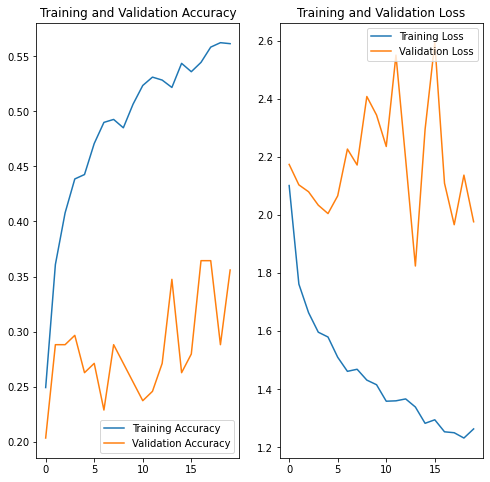

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Although an improvement, there is still some overfitting.
It feels like there could be some more improvement in validation loss if we train for more number of epochs.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
import pandas as pd
train_labels = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
labels = np.array(class_names)[train_labels]
pd.Series(labels).value_counts()


pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

`seborrheic keratosis` has the least number of samples, while the top ones `pigmented benign keratosis` and `melanoma` have almost 6 times this number.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
path_to_training_dataset = "/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBFFFB48CD0>: 100%|██████████| 500/500 [00:18<00:00, 27.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF3217FD00>: 100%|██████████| 500/500 [00:18<00:00, 26.63 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF32198A90>: 100%|██████████| 500/500 [00:18<00:00, 26.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FBF3238E5E0>: 100%|██████████| 500/500 [01:28<00:00,  5.66 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FBF322C57F0>: 100%|██████████| 500/500 [01:19<00:00,  6.31 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBF323CE910>: 100%|██████████| 500/500 [00:17<00:00, 28.27 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBF970A31C0>: 100%|██████████| 500/500 [00:44<00:00, 11.16 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBF9DF7BAF0>: 100%|██████████| 500/500 [00:18<00:00, 26.36 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBF321CD0D0>: 100%|██████████| 500/500 [00:17<00:00, 28.03 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_6a32b1ad-d431-4044-9cd7-4f0784455ae0.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025700.jpg_571a5da5-97d6-4d7c-88a1-cfb703120b24.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_5721a537-b7ee-41ae-bc91-df91820363ca.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026117.jpg_4c430438-b3b0-4d91-be9d-6945e073b90e.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Col

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_new

{'/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_6a32b1ad-d431-4044-9cd7-4f0784455ae0.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025700.jpg_571a5da5-97d6-4d7c-88a1-cfb703120b24.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028035.jpg_5721a537-b7ee-41ae-bc91-df91820363ca.jpg': 'basal cell carcinoma',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026117.jpg_4c430438-b3b0-4d91-be9d-6945e073b90e.jpg': 'basal cell carcinom

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2 #original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

basal cell carcinoma          500
vascular lesion               500
seborrheic keratosis          500
melanoma                      500
actinic keratosis             500
nevus                         500
dermatofibroma                500
squamous cell carcinoma       500
pigmented benign keratosis    500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# data_dir_train
# !ls '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output'

In [ ]:
data_dir_train="/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential(
    [
        # layers.RandomFlip('horizontal_and_vertical', seed=123),
        # layers.RandomRotation(0.1, seed=123),
        # layers.RandomZoom(0.1, 0.1, seed=123),
        layers.experimental.preprocessing.Rescaling(scale=1./255),
        layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(180,180,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        layers.Conv2D(32, 3, padding='same', activation='relu'), #90,90,32
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Dropout(0.25),
        layers.Conv2D(64, 3, padding='same', activation='relu'), #45,45,64
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(9),
    ]
)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=keras.metrics.SparseCategoricalAccuracy())

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
169/169 [==============================] - 43s 240ms/step - loss: 2.8009 - sparse_categorical_accuracy: 0.1332 - val_loss: 36.8179 - val_sparse_categorical_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 36s 207ms/step - loss: 2.1912 - sparse_categorical_accuracy: 0.1402 - val_loss: 18.4406 - val_sparse_categorical_accuracy: 0.0935
Epoch 3/50
169/169 [==============================] - 37s 213ms/step - loss: 2.1860 - sparse_categorical_accuracy: 0.1395 - val_loss: 13.8437 - val_sparse_categorical_accuracy: 0.1255
Epoch 4/50
169/169 [==============================] - 36s 210ms/step - loss: 2.1833 - sparse_categorical_accuracy: 0.1389 - val_loss: 2.9960 - val_sparse_categorical_accuracy: 0.1255
Epoch 5/50
169/169 [==============================] - 36s 206ms/step - loss: 2.1784 - sparse_categorical_accuracy: 0.1432 - val_loss: 2.6329 - val_sparse_categorical_accuracy: 0.1284
Epoch 6/50
169/169 [==============================] - 36s 206ms/step - loss: 2.177

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

